# Introduction

Welcome to the M1 Workshop session in Supervised Machine Learning (SML) and Regression in `Python`.

# Application: the `AirBnb` dataset

The data behind the Inside Airbnb site is sourced from publicly available information from the Airbnb site. The data has been analyzed, cleansed and aggregated where appropriate to faciliate public discussion.


In [ ]:
# loading essential libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)


In [ ]:
# load the data
data = pd.read_csv('http://data.insideairbnb.com/france/nouvelle-aquitaine/bordeaux/2021-07-08/data/listings.csv.gz')

In [ ]:
# Let's check out the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            10616 non-null  int64  
 1   listing_url                                   10616 non-null  object 
 2   scrape_id                                     10616 non-null  int64  
 3   last_scraped                                  10616 non-null  object 
 4   name                                          10615 non-null  object 
 5   description                                   10335 non-null  object 
 6   neighborhood_overview                         6433 non-null   object 
 7   picture_url                                   10615 non-null  object 
 8   host_id                                       10616 non-null  int64  
 9   host_url                                      10616 non-null 

In [ ]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,28925,https://www.airbnb.com/rooms/28925,20210708132623,2021-07-09,Grande maison centre ville Comme à la campagne,"If you just open the housedoor, you'll feel li...","A fex minutes from the house, you'll find nice...",https://a0.muscache.com/pictures/miso/Hosting-...,124398,https://www.airbnb.com/users/show/124398,Laurence,2010-05-13,"Bordeaux, Nouvelle-Aquitaine, France",NaN,within an hour,100%,0%,f,https://a0.muscache.com/im/pictures/user/b539b...,https://a0.muscache.com/im/pictures/user/b539b...,NaN,2.0,2.0,"['email', 'phone', 'reviews', 'work_email']",t,f,"Bordeaux, Aquitaine, France",Centre ville (Bordeaux),Bordeaux,44.85024,-0.59209,Entire house,Entire home/apt,12,NaN,4 baths,6.0,14.0,"[""Outdoor dining area"", ""Mini fridge"", ""Free d...",$234.00,2,21,2,2,21,21,2.0,21.0,NaN,t,0,2,2,144,2021-07-09,2,0,0,2018-07-06,2017-09-10,5.00,5.00,4.50,5.00,5.00,5.00,4.50,33063005371B2,f,1,1,0,0,0.05
1,218103,https://www.airbnb.com/rooms/218103,20210708132623,2021-07-09,B&B Apart.Suite / tropical garden,"<b>The space</b><br />The Bambooyard : ""Le cl...",NaN,https://a0.muscache.com/pictures/9ba23c8f-4780...,1127981,https://www.airbnb.com/users/show/1127981,Luis,2011-09-08,"Bègles, Aquitaine, France",Salut c'est Luis 52 ans passionné de nature et...,within an hour,100%,98%,t,https://a0.muscache.com/im/pictures/user/b05e1...,https://a0.muscache.com/im/pictures/user/b05e1...,NaN,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Bgles,Bgles,44.81545,-0.54808,Entire apartment,Entire home/apt,4,NaN,1 bath,1.0,0.0,"[""Microwave"", ""Kitchen"", ""Bed linens"", ""Cookin...",$110.00,2,21,2,2,21,21,2.0,21.0,NaN,t,11,27,53,123,2021-07-09,45,11,1,2012-05-02,2013-07-05,4.70,4.72,4.72,4.91,4.95,4.51,4.47,NaN,f,4,4,0,0,0.40
2,222887,https://www.airbnb.com/rooms/222887,20210708132623,2021-07-08,"Bordeaux Terrace - spectacular view, fast Wifi",Picture yourself on a 12 metre terrace overloo...,Bordeaux Terrace is ideally situated to visit ...,https://a0.muscache.com/pictures/8f2b210e-3c0e...,1156398,https://www.airbnb.com/users/show/1156398,Suzanna,2011-09-14,"Fes, Fez-Meknès, Morocco","I am a professional writer, renovator and freq...",within an hour,100%,96%,t,https://a0.muscache.com/im/users/1156398/profi...,https://a0.muscache.com/im/users/1156398/profi...,Hôtel de Ville - Quinconces,8.0,8.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Bordeaux, Aquitaine, France",Bordeaux Sud,Bordeaux,44.83611,-0.56640,Entire apartment,Entire home/apt,4,NaN,1 bath,2.0,3.0,"[""Microwave"", ""Long term stays allowed"", ""Kitc...",$202.00,3,90,3,3,90,90,3.0,90.0,NaN,t,8,23,31,197,2021-07-08,43,5,1,2016-08-05,2019-11-11,4.69,4.67,4.45,4.88,4.9

In [ ]:
data = data[data.property_type.isin(['Entire apartment', 'Private room in apartment'])]

In [ ]:
data.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,5.318000e+03,5.318000e+03,5.318000e+03,5316.000000,5316.000000,5318.000000,5318.000000,5318.000000,0.0,4508.000000,5286.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,0.0,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,5318.000000,4353.000000,4282.000000,4286.000000,4282.000000,4284.000000,4282.000000,4282.000000,5318.000000,5318.000000,5318.000000,5318.00000,4353.000000
mean,2.722779e+07,2.021071e+13,9.808946e+07,5.574680,5.574680,44.839150,-0.578339,3.064310,NaN,1.355146,1.603859,5.749906,665.583678,5.715871,6.160963,732.476871,758.255171,5.954645,740.981779,NaN,5.827379,13.975179,22.853328,93.776796,24.685784,5.264949,0.564122,4.593832,4.796649,4.610436,4.848400,4.848172,4.767574,4.633260,4.873825,4.653441,0.217563,0.00188,0.974684
std,1.454715e+07,9.141485e-01,1.023657e+08,19.693032,19.693032,0.019001,0.025918,1.424813,NaN,0.637280,0.910413,22.886722,527.506546,22.879786,23.647497,517.153776,506.883910,23.303431,512.243251,NaN,9.182839,19.650131,30.524860,127.631590,53.484710,12.464474,1.453539,0.700829,0.344054,0.515184,0.309631,0.331685,0.328521,0.417515,14.124213,14.178318,0.569304,0.04747,1.389050
min,2.181030e+05,2.021071e+13,1.194880e+05,0.000000,0.000000,44.755240,-0.778510,1.000000,NaN,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.010000
25%,1.389442e+07,2.021071e+13,2.341671e+07,1.000000,1.000000,44.831030,-0.583655,2.000000,NaN,1.000000,1.000000,1.000000,30.000000,1.000000,2.000000,30.000000,31.000000,1.400000,31.000000,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.500000,4.750000,4.470000,4.820000,4.830000,4.670000,4.500000,1.000000,1.000000,0.000000,0.00000,0.150000
50%,2.513980e+07,2.021071e+13,6.084245e+07,1.000000,1.000000,44.838140,-0.573795,2.000000,NaN,1.000000,1.000000,2.000000,1125.000000,2.000000,2.000000,1125.000000,1125.000000,2.000000,1125.000000,NaN,0.000000,0.000000,0.000000,8.000000,7.000000,0.000000,0.000000,4.750000,4.900000,4.770000,4.940000,4.960000,4.860000,4.720000,1.000000,1.000000,0.000000,0.00000,0.470000
75%,4.114958e+07,2.021071e+13,1.384483e+08,2.000000,2.000000,44.848997,-0.567823,4.000000,NaN,2.000000,2.000000,3.000000,1125.000000,3.000000,3.000000,1125.000000,1125.000000,3.000000,1125.000000,NaN,9.000000,26.000000,45.000000,179.000000,23.000000,5.000000,0.000000,4.940000,5.000000,4.980000,5.000000,5.000000,5.000000,4.890000,2.000000,1.000000,0.000000,0.00000,1.190000
max,5.087459e+07,2.021071e+13,4.104741e+08,259.000000,259.000000,45.010860,-0.476080,16.000000,NaN,10.000000,13.000000,800.000000,1125.000000,800.000000,800.000000,1125.000000,1125.000000,800.000000,1125.000000,NaN,30.000000,60.000000,90.000000,365.000000,797.000000,195.000000,18.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,81.000000,81.000000,9.000000,2.00000,14.900000


In [ ]:
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].astype('float64', copy=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5318 entries, 1 to 10612
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            5318 non-null   int64  
 1   listing_url                                   5318 non-null   object 
 2   scrape_id                                     5318 non-null   int64  
 3   last_scraped                                  5318 non-null   object 
 4   name                                          5317 non-null   object 
 5   description                                   5198 non-null   object 
 6   neighborhood_overview                         3044 non-null   object 
 7   picture_url                                   5317 non-null   object 
 8   host_id                                       5318 non-null   int64  
 9   host_url                                      5318 non-null   

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


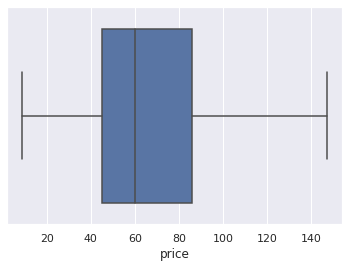

In [ ]:
sns.boxplot(data.price, showfliers=False)

In [ ]:
# Select variables

columns = [17,25,27,31,32,33,34,36,37,39, 40,50,51,52,53,55,60,61,62,63,64,65,66,68,73]
x = data.iloc[:, columns]

In [ ]:
x.drop('bathrooms', axis=1, inplace=True)
x = x.dropna()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
x['host_is_superhost'].replace(to_replace=['t','f'], value=[1,0],inplace=True)
x['host_identity_verified'].replace(to_replace=['t','f'], value=[1,0],inplace=True)
x.head()

,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
1,1,1,Bgles,Entire apartment,Entire home/apt,4,1.0,0.0,110.0,2,11,27,53,123,45,4.70,4.72,4.72,4.91,4.95,4.51,4.47,f,0.40
2,1,1,Bordeaux Sud,Entire apartment,Entire home/apt,4,2.0,3.0,202.0,3,8,23,31,197,43,4.69,4.67,4.45,4.88,4.95,4.70,4.48,t,0.72
3,1,1,Chartrons - Grand Parc - Jardin Public,Entire apartment,Entire home/apt,3,1.0,2.0,145.0,3,7,16,27,193,26,4.88,4.96,4.69,4.96,4.92,4.88,4.60,t,0.47
4,1,1,Centre ville (Bordeaux),Entire apartment,Entire home/apt,6,2.0,4.0,202.0,3,3,14,35,198,61,4.84,4.72,4.76,4.92,4.85,4.97,4.65,t,0.77
6,0,1,Centre ville (Bordeaux),Entire apartment,Entire home/apt,2,1.0,1.0,101.0,2,0,0,0,0,40,4.59,4.87,4.38,4.85,4.87,4.79,4.56,f,0.41


In [ ]:
x = x.drop(['neighbourhood_cleansed', 'property_type', 'room_type'], axis=1)
x.head()

,host_is_superhost,host_identity_verified,accommodates,bedrooms,beds,price,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
1,1,1,4,1.0,0.0,110.0,2,11,27,53,123,45,4.70,4.72,4.72,4.91,4.95,4.51,4.47,f,0.40
2,1,1,4,2.0,3.0,202.0,3,8,23,31,197,43,4.69,4.67,4.45,4.88,4.95,4.70,4.48,t,0.72
3,1,1,3,1.0,2.0,145.0,3,7,16,27,193,26,4.88,4.96,4.69,4.96,4.92,4.88,4.60,t,0.47
4,1,1,6,2.0,4.0,202.0,3,3,14,35,198,61,4.84,4.72,4.76,4.92,4.85,4.97,4.65,t,0.77
6,0,1,2,1.0,1.0,101.0,2,0,0,0,0,40,4.59,4.87,4.38,4.85,4.87,4.79,4.56,f,0.41


In [ ]:
y = x.price

In [ ]:
x.drop('price', axis=1, inplace=True)
x = pd.get_dummies(x)
x.head()

,host_is_superhost,host_identity_verified,accommodates,bedrooms,beds,minimum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,instant_bookable_f,instant_bookable_t
1,1,1,4,1.0,0.0,2,11,27,53,123,45,4.70,4.72,4.72,4.91,4.95,4.51,4.47,0.40,1,0
2,1,1,4,2.0,3.0,3,8,23,31,197,43,4.69,4.67,4.45,4.88,4.95,4.70,4.48,0.72,0,1
3,1,1,3,1.0,2.0,3,7,16,27,193,26,4.88,4.96,4.69,4.96,4.92,4.88,4.60,0.47,0,1
4,1,1,6,2.0,4.0,3,3,14,35,198,61,4.84,4.72,4.76,4.92,4.85,4.97,4.65,0.77,0,1
6,0,1,2,1.0,1.0,2,0,0,0,0,40,4.59,4.87,4.38,4.85,4.87,4.79,4.56,0.41,1,0


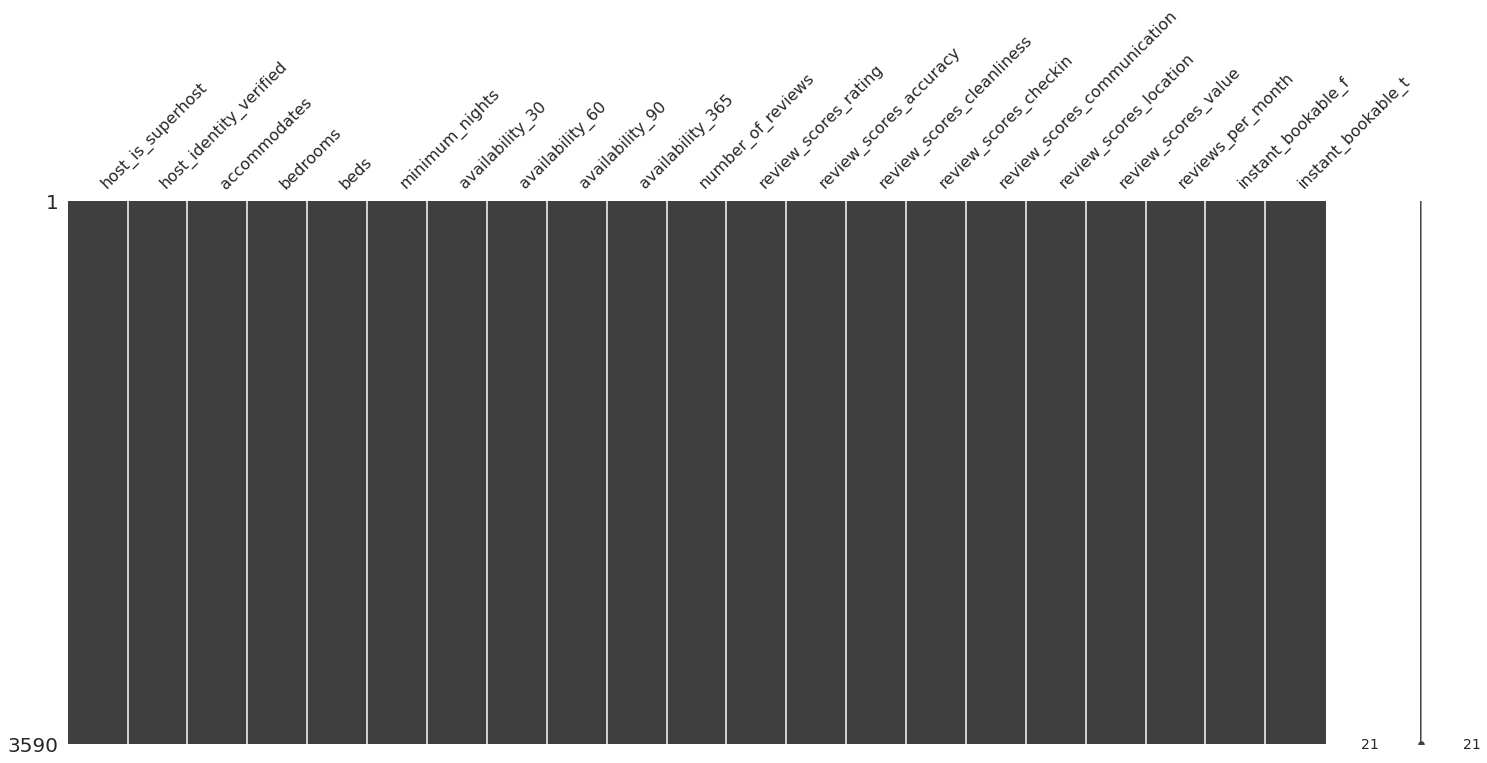

In [ ]:
import missingno as msno
msno.matrix(x)

In [ ]:
# load up scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
X = preprocessing.StandardScaler().fit(x).transform(x)

In [ ]:
#Split the Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2692, 21) (2692,)
Test set: (898, 21) (898,)


In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 1.88362829  0.94402517 16.47908287 16.52360395 -1.23079614  0.21952594
  3.00131844  3.92597883  0.28553039  5.82407997  0.99644905  2.52652472
  3.32148517  2.91840711 -3.34136753 -1.13471749  8.46541855 -8.40371274
 -2.74367467 -1.9824557   1.9824557 ]


In [ ]:
y_hat= regr.predict(X_train)
x = np.asanyarray(X_train)
y = np.asanyarray(y_train)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 3166.65
Variance score: 0.28


In [ ]:
x = np.asanyarray(X_train)
y = np.asanyarray(y_train)
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

y_hat= regr.predict(X_test)
x = np.asanyarray(X_test)
y = np.asanyarray(y_test)
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [ 1.88362829  0.94402517 16.47908287 16.52360395 -1.23079614  0.21952594
  3.00131844  3.92597883  0.28553039  5.82407997  0.99644905  2.52652472
  3.32148517  2.91840711 -3.34136753 -1.13471749  8.46541855 -8.40371274
 -2.74367467 -1.9824557   1.9824557 ]
Residual sum of squares: 21540.51
Variance score: 0.03


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


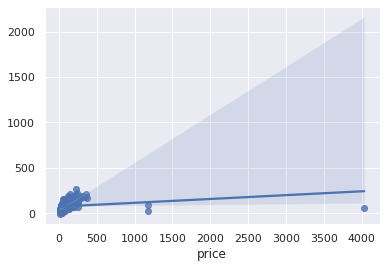

In [ ]:
sns.regplot(y_test, y_hat)

In [ ]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y) ** 2))
print("R2-score: %.2f" % r2_score(y , y_hat) )

Mean absolute error: 30.39
Residual sum of squares (MSE): 21540.51
R2-score: 0.03
